# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [160]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [161]:
import warnings

warnings.filterwarnings("ignore")
from sklearn.utils import shuffle
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    accuracy_score,
)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [162]:
data = pd.read_csv("train.csv")
data.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [163]:
data = shuffle(data)
train_len = round(len(data) * 0.7)
train, val = data.iloc[:train_len], data.iloc[train_len:]
print(f"data ({len(data)}): train ({len(train)}) + val ({len(val)})")

data (891): train (624) + val (267)


Проверим, что обучающая и тестовая выборки не пересекаются:

In [164]:
assert not set(train.index).intersection(val.index), set(
    train.index
).intersection(val.index)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [165]:
features_columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак


def get_features_and_target(data):
    """
    Функция из условия для разбиения на фичи и таргет
    """
    features = data.loc[:, features_columns].reset_index().drop("index", axis=1)
    target = data.loc[:, target_column].reset_index().drop("index", axis=1)
    return features, target

In [166]:
x_train, y_train = get_features_and_target(train)
x_val, y_val = get_features_and_target(val)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

##### 2.0 Общий обзор

Первым делом, проведем обзор оставшихся признаков (согласно описанию со [страницы задачи](https://www.kaggle.com/c/titanic/data)). Потом изучим каждый признак в отдельности

- Pclass - класс билета  
- Sex - пол *(сразу же гипотеза: женщины выживали чаще)*  
- Age - возраст *(гипотеза: дети и старики выживали чаще)*  
- SibSp - кол-во братьев\сестер ии супругов на борту  
- Parch - кол-во детей\родителей на борту  
- Fare - стоимость билета *(гипотеза: богатые выживали чаще)*  
    
- Survived - целевая переменная: выжил ли человек  

И еще один важный момент: посмотрим наличие пропусков в данных. Пропуски только в признаке "возраст"

In [167]:
display(x_train.isna().sum())

Pclass      0
Sex         0
Age       123
SibSp       0
Parch       0
Fare        0
dtype: int64

##### 2.1 Pclass

Признак принимает 3 значения: классы 1, 2 и 3 (они уже закодированы)

In [168]:
print(
    f"{x_train.Pclass.nunique()} уникальных значения Pclass:",
    ", ".join(sorted(x_train.Pclass.unique().astype(str))),
)

3 уникальных значения Pclass: 1, 2, 3


Посмотрим распределение этого признака.  
Видно, что преобладает Pclass = 3. Гугление помогло установить, что 3й класс - самый дешевый, поэтому логично, что билетов этого типа было продано больше.  Эти кабины располагались на нижних уровнях Титаника и быстрее всего заполнились водой, что может сыграть в пользу гипотезы "богатые выживали чаще"   

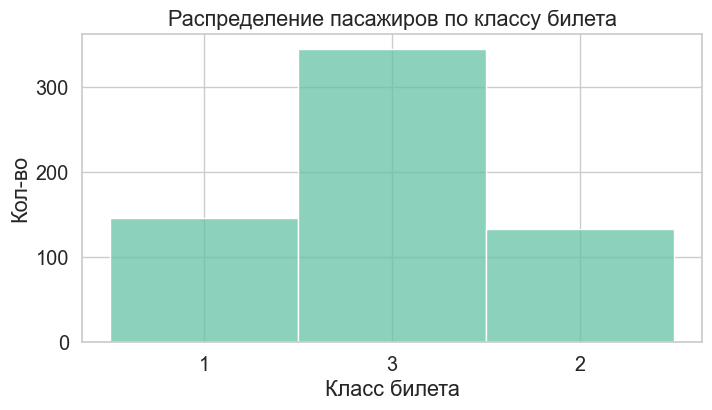

In [169]:
plt.figure(figsize=(8, 4))
x_train["Pclass"] = x_train["Pclass"].astype(str)
sns.histplot(data=x_train, x="Pclass").set(
    title="Распределение пасажиров по классу билета",
    xlabel="Класс билета",
    ylabel="Кол-во",
)
x_train["Pclass"] = x_train["Pclass"].astype(int)
plt.show()

Посмотрим, как класс билета влиял на выживаемость. Видно, что гипотеза о связи класса билета и выживаемости подтверждатся: чем дороже билет, тем выше доля выживших

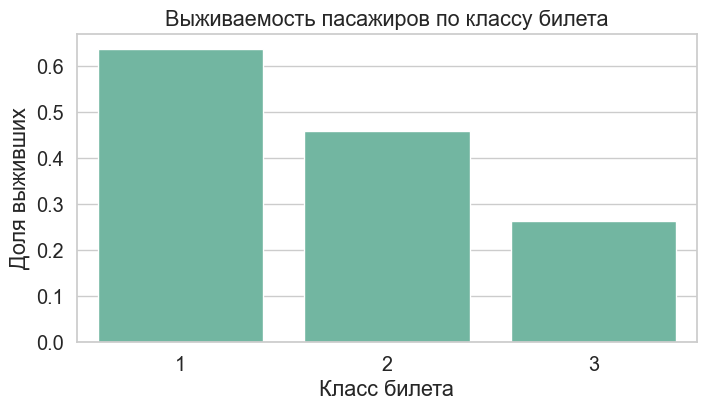

In [170]:
pclass_research = (
    train[["Pclass", "Survived"]].groupby("Pclass").mean().reset_index()
)
plt.figure(figsize=(8, 4))
sns.barplot(data=pclass_research, x="Pclass", y="Survived").set(
    title="Выживаемость пасажиров по классу билета",
    xlabel="Класс билета",
    ylabel="Доля выживших",
)
plt.show()

##### 2.2 Sex

Признак принимает 2 значения: 'male' и 'female'. Их нужно закодировать, пусть male -> 0, female -> 1 (после гистограммы)

In [171]:
x_train["Sex"] = x_train["Sex"].apply(lambda x: {"male": "М", "female": "Ж"}[x])
train["Sex"] = train["Sex"].apply(lambda x: {"male": "М", "female": "Ж"}[x])
print(
    f"{x_train.Sex.nunique()} уникальных значения Sex:",
    ", ".join(x_train.Sex.unique()),
)

2 уникальных значения Sex: М, Ж


Посмотрим распределение по полу. Видно, что мужчин почти вдвое больше. Возможно, такой дисбаланс связан с половым неравенством в начале ХХ века: например, женщинам было не принято путешествовать в одиночку. Это можно проверить, если выделить признак "путешествует самостоятельно", оценив число попутчиков как сумму SibSp и Parch (число братьев\сестер, супругов, родителей и детей на борту). Но это уже ответвление от основной задачи

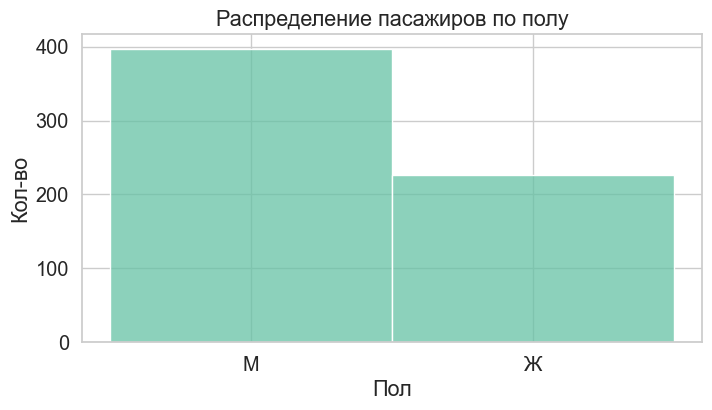

In [172]:
plt.figure(figsize=(8, 4))
sns.histplot(data=x_train, x="Sex").set(
    title="Распределение пасажиров по полу", xlabel="Пол", ylabel="Кол-во"
)
plt.show()

Посмотрим, как пол влиял на выживаемость. Видно, что гипотеза о связи пола и выживаемости тоже подтверждатся: женщины выживали в 74% случаев, а мужчины - лишь в 18%

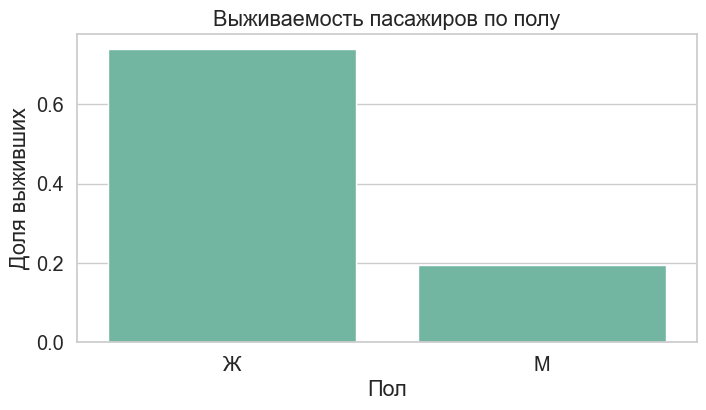

In [173]:
sex_research = train[["Sex", "Survived"]].groupby("Sex").mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(data=sex_research, x="Sex", y="Survived").set(
    title="Выживаемость пасажиров по полу", xlabel="Пол", ylabel="Доля выживших"
)
plt.show()

Кодировка признака

In [174]:
x_train["Sex"] = x_train["Sex"].apply(lambda x: {"М": 0, "Ж": 1}[x])
x_val["Sex"] = x_val["Sex"].apply(lambda x: {"male": 0, "female": 1}[x])

##### 2.3 Age

На борту находились люди от 0 до 80 лет. В этом столбце больше ста пропусков, что составляет довольно большую часть от всего датасета, поэтому удалять эти строки нельзя. Решим, что с ними делать, в конце блока

In [175]:
print(
    f"Диапазон возрастов: {x_train.Age.min()}-{x_train.Age.max()}, в среднем {round(x_train.Age.mean())}"
)
print(f"Пропусков: {x_train.Age.isna().sum()}")

Диапазон возрастов: 0.42-80.0, в среднем 29
Пропусков: 123


Посмотрим распределение пассажиров по возрасту. В целом, оно близко к нормальному

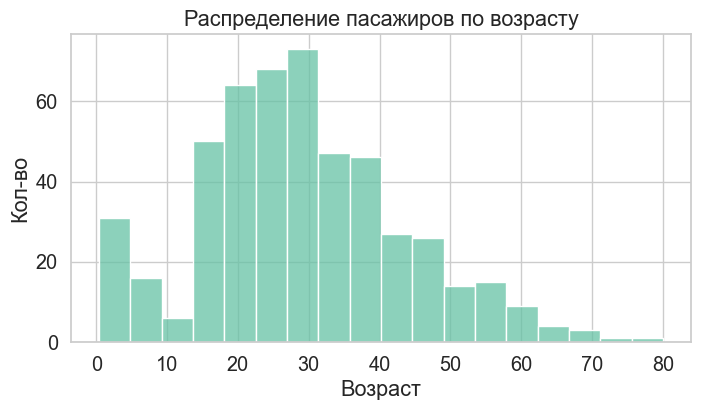

In [176]:
plt.figure(figsize=(8, 4))
sns.histplot(data=x_train, x="Age").set(
    title="Распределение пасажиров по возрасту",
    xlabel="Возраст",
    ylabel="Кол-во",
)
plt.show()

Посмотрим, как возраст влиял на выживаемость. Для простоты разобьем людей на 3 примерно равные возрастные группы: до 20 ("младшие"), 20-40 ("средние"), от 40 ("старшие"), плюс отделим людей, чей возраст не указан. Видно, что гипотеза о влиянии возраста на выживаемость частично подтверждается: по крайней мере, дети выживали чаще, чем остальные. Наименьшая выживаемость в группе, где не указан возраст: возможно, это как раз более бедные люди (без паспортов?), которые, как уже было видно, погибали чаще

,AgeGroup,MeanAge,Survived
0,0,11.793750,0.541667
1,1,28.393382,0.378676
2,2,49.876147,0.394495
3,unknown,-1.000000,0.276423


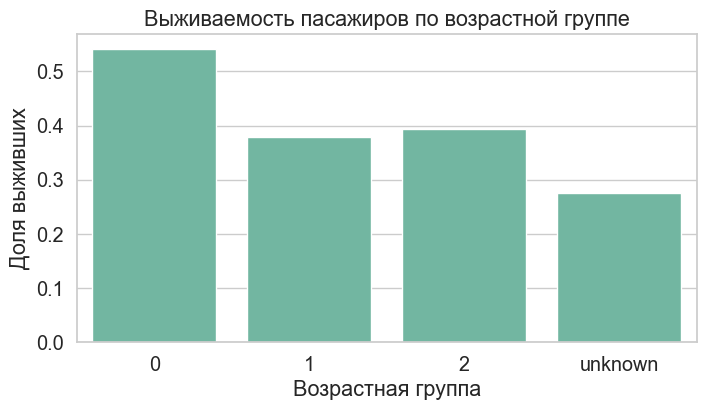

In [177]:
age_research = train[["Age", "Survived"]]
age_research = age_research.fillna(-1)
age_research["AgeGroup"] = age_research["Age"].apply(
    lambda x: (
        "unknown" if x == -1 else "0" if x < 20 else "1" if x < 40 else "2"
    )
)
age_research = age_research.groupby("AgeGroup").mean().reset_index()
age_research = age_research.rename(columns={"Age": "MeanAge"})
display(age_research)

plt.figure(figsize=(8, 4))
sns.barplot(data=age_research, x="AgeGroup", y="Survived").set(
    title="Выживаемость пасажиров по возрастной группе",
    xlabel="Возрастная группа",
    ylabel="Доля выживших",
)
plt.show()

Осталось обработать пропуски в столбце Age. Попробуем заполнить их средним значением по столбцу - это создаст пик в распределении, но зато для обучения модели будет больше данных

In [178]:
x_train_age_mean = x_train["Age"].mean()
x_train["Age"] = x_train["Age"].fillna(x_train_age_mean)

##### 2.4 SibSp и Parch

У обоих признаков SibSp и Parch - несколько уникаьных значений от 0 до ~10

In [179]:
print(
    f"{x_train.SibSp.nunique()} уникальных значений SibSp:",
    ", ".join(sorted(x_train.SibSp.unique().astype(str))),
)
print(
    f"{x_train.Parch.nunique()} уникальных значений Parch:",
    ", ".join(sorted(x_train.Parch.unique().astype(str))),
)

7 уникальных значений SibSp: 0, 1, 2, 3, 4, 5, 8
7 уникальных значений Parch: 0, 1, 2, 3, 4, 5, 6


Посмотрим распределение по обоим признакам. В основном люди путешествовали сами, и возможно более информативный признак - бинарный (сам\с семьей)

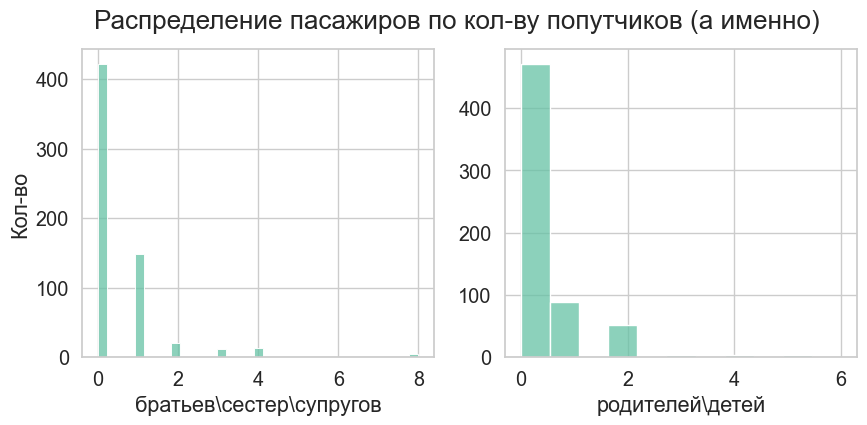

In [198]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("Распределение пасажиров по кол-ву попутчиков (а именно)")
sns.histplot(data=x_train, x="SibSp", ax=ax[0]).set(
    xlabel="братьев\сестер\супругов", ylabel="Кол-во"
)
sns.histplot(data=x_train, x="Parch", ax=ax[1]).set(
    xlabel="родителей\детей", ylabel=" "
)
fig.show()

Сгруппируем всех людей с суммарным числом попутчиков > 0, и посмотрим выживаемость в каждой категории. Интересно, что люди с попутчиками выживали чаще

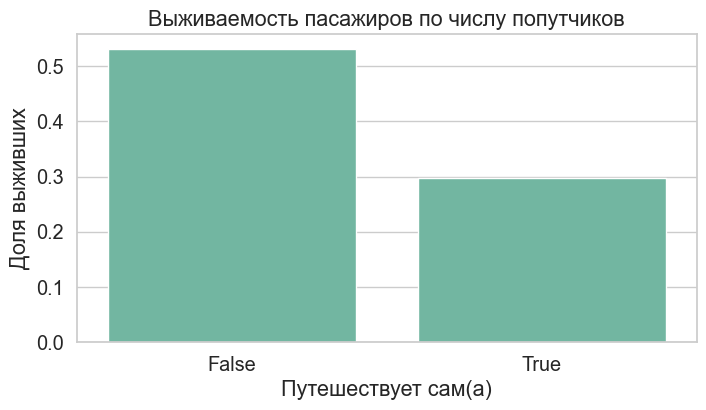

In [181]:
sibsp_research = train[["SibSp", "Parch", "Survived"]]
sibsp_research["TravelsAlone"] = (
    sibsp_research["SibSp"] + sibsp_research["Parch"]
)
sibsp_research["TravelsAlone"] = sibsp_research["TravelsAlone"].apply(
    lambda x: True if x == 0 else False
)
sibsp_research = sibsp_research.groupby("TravelsAlone").mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=sibsp_research, x="TravelsAlone", y="Survived").set(
    title="Выживаемость пасажиров по числу попутчиков",
    xlabel="Путешествует сам(а)",
    ylabel="Доля выживших",
)
plt.show()

Возможно, что путешествовать с семьей было дороже, а богатые выживали чаще => люди с попутчиками выживаи чаще. Проверим: действительно, несмотря на выбросы, в среднем билет "семьянина" вдвое дороже билета "одинокого путника"

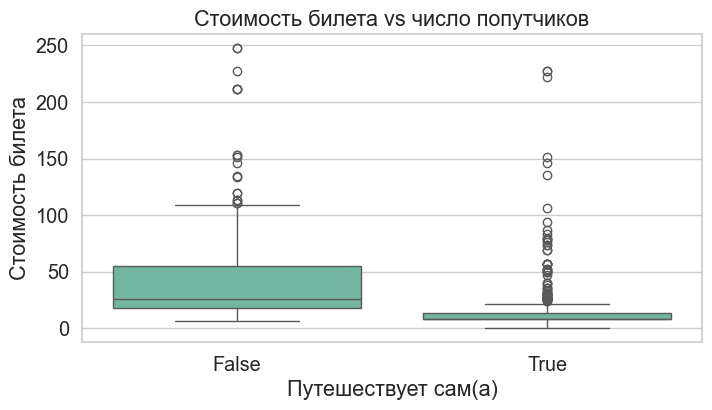

In [182]:
sibsp_vs_fare = train[["SibSp", "Parch", "Fare"]]
sibsp_vs_fare["TravelsAlone"] = sibsp_vs_fare["SibSp"] + sibsp_vs_fare["Parch"]
sibsp_vs_fare["TravelsAlone"] = sibsp_vs_fare["TravelsAlone"].apply(
    lambda x: True if x == 0 else False
)
sibsp_vs_fare = sibsp_vs_fare[
    sibsp_vs_fare.Fare < 250
]  # отрежем два выброса для наглядности (спойлер: методом 5 сигм)

plt.figure(figsize=(8, 4))
sns.boxplot(data=sibsp_vs_fare, x="TravelsAlone", y="Fare").set(
    title="Стоимость билета vs число попутчиков",
    xlabel="Путешествует сам(а)",
    ylabel="Стоимость билета",
)
plt.show()

##### 2.5 Fare

Стоимость билетов варьировалась от 0 до ~500 (долларов?), но в среднем составляла порядка 30

In [183]:
print(
    f"Диапазон стоимости билета: {round(x_train.Fare.min())}-{round(x_train.Fare.max())}, в среднем {round(x_train.Fare.mean())}"
)

Диапазон стоимости билета: 0-512, в среднем 32


Посмотрим распределение пассажиров по возрасту. Видно, что есть выбросы: отсеем все значения, выходящие за 5 сигм (т.е. >250)

Нашли 2 выброс(а\ов)


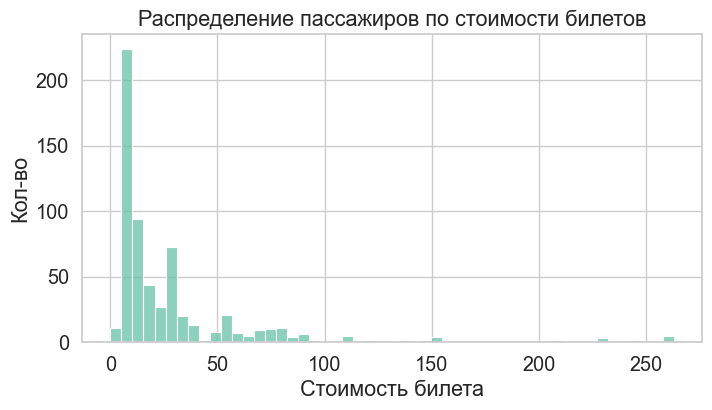

In [184]:
outliers = x_train.Fare > x_train.Fare.mean() + 5 * x_train.Fare.std()
print(f"Нашли {outliers.sum()} выброс(а\ов)")
x_train, y_train = x_train[~outliers], y_train[~outliers]

plt.figure(figsize=(8, 4))
sns.histplot(data=x_train, x="Fare").set(
    title="Распределение пассажиров по стоимости билетов",
    xlabel="Стоимость билета",
    ylabel="Кол-во",
)
plt.show()

Корреляцию уровня дохода и выживаемости уже смотрели по классу билета, поэтому тут можем ее не проверять

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [185]:
def find_nearest_points(A, B, k):
    """
    A - трейн, B - тест. Для каждой точки b возвращает k ближайших из A.
    Только зачем это, если есть sklearn.neighbors.KNeighborsClassifier (
    """
    distances = np.repeat(A[:, :, np.newaxis], len(B), axis=2) - B.T
    distances = np.sqrt(np.sum(distances**2, axis=1))
    return np.argsort(distances, axis=0)[:k, :].T  # индексы с 0


def knn(val_features, train_features, train_target, k=1):
    """
    Предсказание целевого признака для данных (val_)features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    """
    # val_features, train_features, train_target = val_features.loc[:2], train_features.loc[:2], train_target.loc[:2]
    val_features = val_features.to_numpy()
    train_features = train_features.to_numpy()
    train_target = train_target.to_numpy()
    indices = find_nearest_points(train_features.copy(), val_features.copy(), k)
    predicted = []
    for row in indices:
        predicted.append(round(train_target[row].mean()))
    return pd.Series(predicted)

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`. 

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

**Дорешка**  
Какую метрику использую: используется евклидова метрика расстояния (L2-норма). Используется именно эта метрика, потому что так было в примерах на лекции. В целом, можно было использовать, например, манхэттенское расстояние L1, или что-либо промежуточное. Плюс L2-нормы - она интуитивно понятна, так как соответствует расстоянию между точками в евклидовой геометрии, а метод ближайшего соседа, по сути, смотрит на такое расстояние, но в пространстве признаков некоторой размерности         
Прдварительная обработка признаков: признаки необходимо нормализовать (сделать mean=0, std=1), плюс с валидации остались пропуски в столбце Age (их заполним аналогично трейн-выборке)   

**Оригинал**  
Используется евклидова метрика расстояния (L2-норма). Признаки необходимо нормализовать (сделать mean=0, std=1), плюс с валидации остались пропуски в столбце Age (их заполним аналогично трейн-выборке)  

In [186]:
x_val["Age"] = x_val["Age"].fillna(x_train_age_mean)
for features in [x_train, x_val]:
    features[["AgeNormed", "FareNormed"]] = (
        features[["Age", "Fare"]] - features[["Age", "Fare"]].mean()
    ) / features[["Age", "Fare"]].std()
y_val_pred = knn(
    x_val[["AgeNormed", "FareNormed"]],
    x_train[["AgeNormed", "FareNormed"]],
    y_train,
)

Посмотрим на конфьюжн-матрицу (ожидание: при k=1 будет все плохо, подтвердилось)

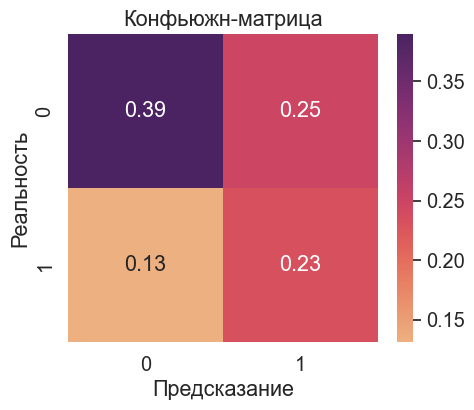

In [187]:
plt.figure(figsize=(5, 4))
sns.heatmap(
    confusion_matrix(y_val, y_val_pred, normalize="all"),
    annot=True,
    cmap=sns.color_palette("flare", as_cmap=True),
).set(title="Конфьюжн-матрица", xlabel="Предсказание", ylabel="Реальность")
plt.show()

Далее будем измерять следующие метрики: precision, recall и accuracy

In [188]:
def evaluate(y_true, y_pred):
    """
    Оценка качества модели по трем метрикам
    """
    return {
        name: f(y_true, y_pred)
        for name, f in zip(
            ["Precision", "Recall", "Accuracy"],
            [precision_score, recall_score, accuracy_score],
        )
    }

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

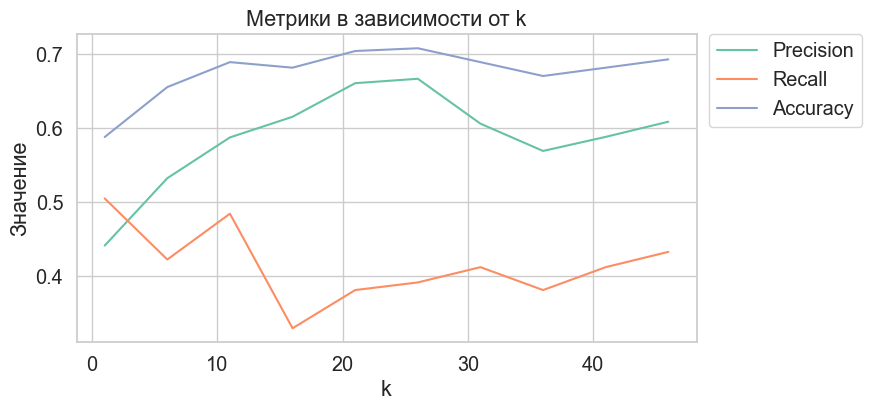

In [189]:
metrics = {"k": [], "Метрика": [], "value": []}
for k in range(1, 50, 5):
    y_val_pred = knn(
        x_val[["Age", "Fare"]], x_train[["Age", "Fare"]], y_train, k
    )
    cur_metrics = evaluate(y_val, y_val_pred)
    for metric in ["Precision", "Recall", "Accuracy"]:
        metrics["k"].append(k)
        metrics["Метрика"].append(metric)
        metrics["value"].append(cur_metrics[metric])
metrics = pd.DataFrame(metrics)

plt.figure(figsize=(8, 4))
sns.lineplot(data=metrics, x="k", y="value", hue="Метрика").set(
    title="Метрики в зависимости от k", xlabel="k", ylabel="Значение"
)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.show()

Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы? 

Строить классификатор с другими признаками при этом не нужно.

**Дорешка:**  
Учесть другие признаки можно было бы например так: добавить в обрабатываемый набор признак пол. Наверняка женщины выживали чаще мужчин (что рассматривается в одном из логических правил ниже)    
Какие могут возникнуть проблемы: повышается шанс переобучения + неотнормированные признаки дадут разный вклад в расстояние. Это стоит учесть при раширении набора исследуемых признаков

**Оригинал:**  
Можно было бы включить остальные признаки без какой-либо сложности, т.к. в алгоритме просто будут сравниваться векторы большей размерности. Единственное, нужно убедиться, что нет пропусков и все значения числовые, но мы это уже сдеали при подготовке данных

#### 4. Классификация логическими правилами

На основе проведенного выше исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**  
**Дорешка:**  
Если пассажир - женщина, то он выжил. Иначе, если пассажир моложе 20 лет, то выжил, а в противном случае - погиб.     
  
**Оригинал:**  
if Sex == 1:  \# женщины   
__выжил   
else:   
__if Age < 20:  \# и дети  
____выжил  
__else:  
____погиб   
 
**Дерево 2:**  
**Дорешка:**  
Если пассажир ехал на нижних\дешевых палубах (Pclass 3), то он погиб  
  
**Оригинал:**  
if Pclass == 3: # нижние\дешевые палубы  
__погиб  
else:  
__выжил   

Реализуйте полученные деревья по шаблону

In [190]:
def tree1(features):
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    """
    return features[["Sex", "Age"]].apply(
        lambda x: 1 if (x.Sex == 1 or x.Age < 20) else 0, axis=1
    )


def tree2(features):
    return features["Pclass"].apply(lambda x: 0 if x == 3 else 1)

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Например, можно рассмотреть accuracy, то есть долю всех верно угаданных лейблов (0 - где 0, 1 - где 1) из всех. Не искал, это из знаний)

Реализуйте данный критерий по шаблону

In [191]:
def criterion(target, predicted):  # accuracy
    """
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    """
    return (1 - (target["Survived"] ^ predicted)).sum() / len(target)

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [192]:
scores = [
    criterion(
        y_val,
        knn(
            x_val[["AgeNormed", "FareNormed"]],
            x_train[["AgeNormed", "FareNormed"]],
            y_train,
            k=10,
        ),
    )
]
for tree in [tree1, tree2]:
    scores.append(criterion(y_val, tree(x_val[["Sex", "Age", "Pclass"]])))
print("Значения критерия:", ", ".join([str(round(s, 2)) for s in scores]))

Значения критерия: 0.67, 0.73, 0.7


Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

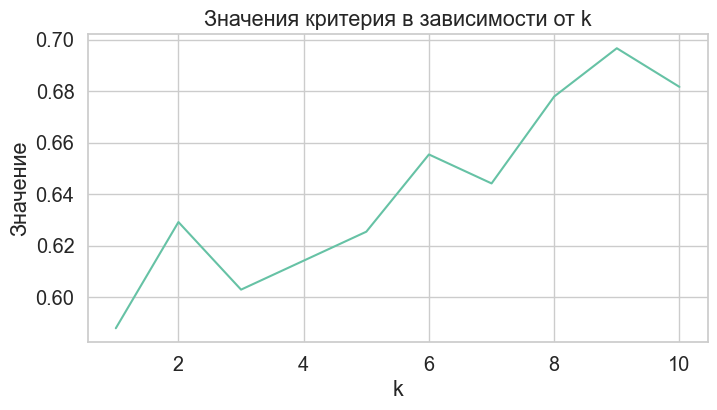

In [193]:
metrics = {"k": list(range(1, 11)), "value": []}
for k in range(1, 11):
    y_val_pred = knn(
        x_val[["Age", "Fare"]], x_train[["Age", "Fare"]], y_train, k
    )
    metrics["value"].append(criterion(y_val, y_val_pred))
metrics = pd.DataFrame(metrics)

plt.figure(figsize=(8, 4))
sns.lineplot(data=metrics, x="k", y="value").set(
    title="Значения критерия в зависимости от k", xlabel="k", ylabel="Значение"
)
plt.show()

При перезапусках ноутбука график сильно менялся, поэтому точное оптимальное значение k установить не получилось. Вероятно, с добавлением остальных признаков зависимость метрики от k приобретет более устойчивую форму (в идеале - выделится единственный максимум). Однако, уже сейчас видно, что k должно быть >1. Это можно объяснить тем, что при k>1 модель более устойчива к выбросам

Мне еще стало интересно сделать из трех моделей ансамбль и оценить его точность. Получилось обогнать одиночные модели)

In [196]:
ensemble_pred = (
    (
        (
            knn(
                x_val[["AgeNormed", "FareNormed"]],
                x_train[["AgeNormed", "FareNormed"]],
                y_train,
                k=10,
            )
            + tree1(x_val[["Sex", "Age", "Pclass"]])
            + tree2(x_val[["Sex", "Age", "Pclass"]])
        )
        / 3
    )
    .round()
    .astype(int)
)
print(
    f"Значения критерия для ансамбля: {round(criterion(y_val, ensemble_pred), 2)}"
)

Значения критерия для ансамбля: 0.79


#### 6. Выводы

В ходе работы удалось изучить датасет пассажиров титаника и заметить несколько ценных закономерностей. По итогам этого анализа, удалось построить 3 простые модели для предсказания выживаемости пассажиров титаника: k nearest neighbors и два дерева решений. Удивительно, но даже такие простые подходы уже дают неплохую точность (accuracy): порядка 70%